# Imports

In [1]:
import numpy as np
import data
from kmeans import KmeansClustering
from evaluator import Evaluator
from plotter import Plotter
from spectral_clustering import SpectralClustering
from utilities import *
from dbscan import DBSCAN

# Reading Data

In [2]:
dataLoader = data.DataLoader()

pure_dataset = dataLoader.get_pure_data()
solution_a_dataset = dataLoader.get_modified_data_solution_a()
solution_b_dataset_before_projection = dataLoader._get_modified_data_solution_b_before_projection()
solution_b_dataset = dataLoader.get_modified_data_solution_b()
x_train, y_train, x_test, y_test = dataLoader.get_splitted_data(solution_a=True)
x_train2, y_train2, x_test2, y_test2 = dataLoader.get_splitted_data(solution_a=False)

print(f"Pure Dataset Dims:                           {pure_dataset.shape}")
print(f"Solution A Dataset Dims:                     {solution_a_dataset.shape}")
print(f"Solution B (before projection) Dataset Dims: {solution_b_dataset_before_projection.shape}")
print(f"Solution B (after projection) Dataset Dims:  {solution_b_dataset.shape}\n")
print(f"Train and Test Splits (solution A) Dims:  \n"
      f"\tx_train.shape =              {x_train.shape}\n"
      f"\ty_train.shape =              {y_train.shape}\n"
      f"\tx_test.shape =               {x_test.shape}\n"
      f"\ty_test.shape =               {y_test.shape}\n")
print(f"Train and Test Splits (solution B) Dims:  \n"
      f"\tx_train.shape =              {x_train2.shape}\n"
      f"\ty_train.shape =              {y_train2.shape}\n"
      f"\tx_test.shape =               {x_test2.shape}\n"
      f"\ty_test.shape =               {y_test2.shape}\n")

Pure Dataset Dims:                           (9120, 125, 45)
Solution A Dataset Dims:                     (9120, 45)
Solution B (before projection) Dataset Dims: (9120, 5625)
Solution B (after projection) Dataset Dims:  (9120, 654)

Train and Test Splits (solution A) Dims:  
	x_train.shape =              (7296, 45)
	y_train.shape =              (7296,)
	x_test.shape =               (1824, 45)
	y_test.shape =               (1824,)

Train and Test Splits (solution B) Dims:  
	x_train.shape =              (7296, 654)
	y_train.shape =              (7296,)
	x_test.shape =               (1824, 654)
	y_test.shape =               (1824,)


# Kmeans

In this notebook, we will implement the K-means clustering algorithm to solve a specific problem. The problem statement requires us to change the number of clusters (K) in the algorithm and compare the results for different K values. K-means is a popular unsupervised machine learning algorithm used for clustering similar data points into groups. It works by iteratively assigning data points to K clusters based on the mean of the data points in each cluster, and then updating the cluster centroids until convergence.

In our implementation, we will change the value of K to {8, 13, 19, 28, 38} clusters and generate different clusters for each value of K. We will then compare the clusters generated for different K values to understand how the choice of K affects the clustering results. This comparison will help us evaluate the performance of the K-means algorithm for different numbers of clusters and determine the optimal number of clusters for our problem.

<div style="text-align:center;">
 
![KMeans Algorithm Pseudocode](images/kmeans_pseudo.png)
 
</div>

In [3]:
k_values = np.array([8, 13, 19, 28, 38])

solution_a_results_train = np.zeros((len(k_values), 5))
solution_a_results_test = np.zeros((len(k_values), 5))

solution_b_results_train = np.zeros((len(k_values), 5))
solution_b_results_test = np.zeros((len(k_values), 5))

## Solution A of data (Mean of features)

In [4]:
for i in range(len(k_values)):
      kmeans = KmeansClustering(k_values[i])
      kmeans.fit(x_train)
      
      clusters_train_data = kmeans.predict(x_train)
      evaluator_train = Evaluator(y_train, clusters_train_data)
      
      solution_a_results_train[i, 0] = evaluator_train.compute_precision()
      solution_a_results_train[i, 1] = evaluator_train.compute_recall()
      solution_a_results_train[i, 2] = evaluator_train.compute_f1()
      solution_a_results_train[i, 3] = evaluator_train.compute_conditional_entropy()
      solution_a_results_train[i, 4] = evaluator_train.computer_accuracy()
      
      
      clusters_test_data = kmeans.predict(x_test)
      evaluator_test = Evaluator(y_test, clusters_test_data)
      
      solution_a_results_test[i, 0] = evaluator_test.compute_precision()
      solution_a_results_test[i, 1] = evaluator_test.compute_recall()
      solution_a_results_test[i, 2] = evaluator_test.compute_f1()
      solution_a_results_test[i, 3] = evaluator_test.compute_conditional_entropy()
      solution_a_results_test[i, 4] = evaluator_test.computer_accuracy()

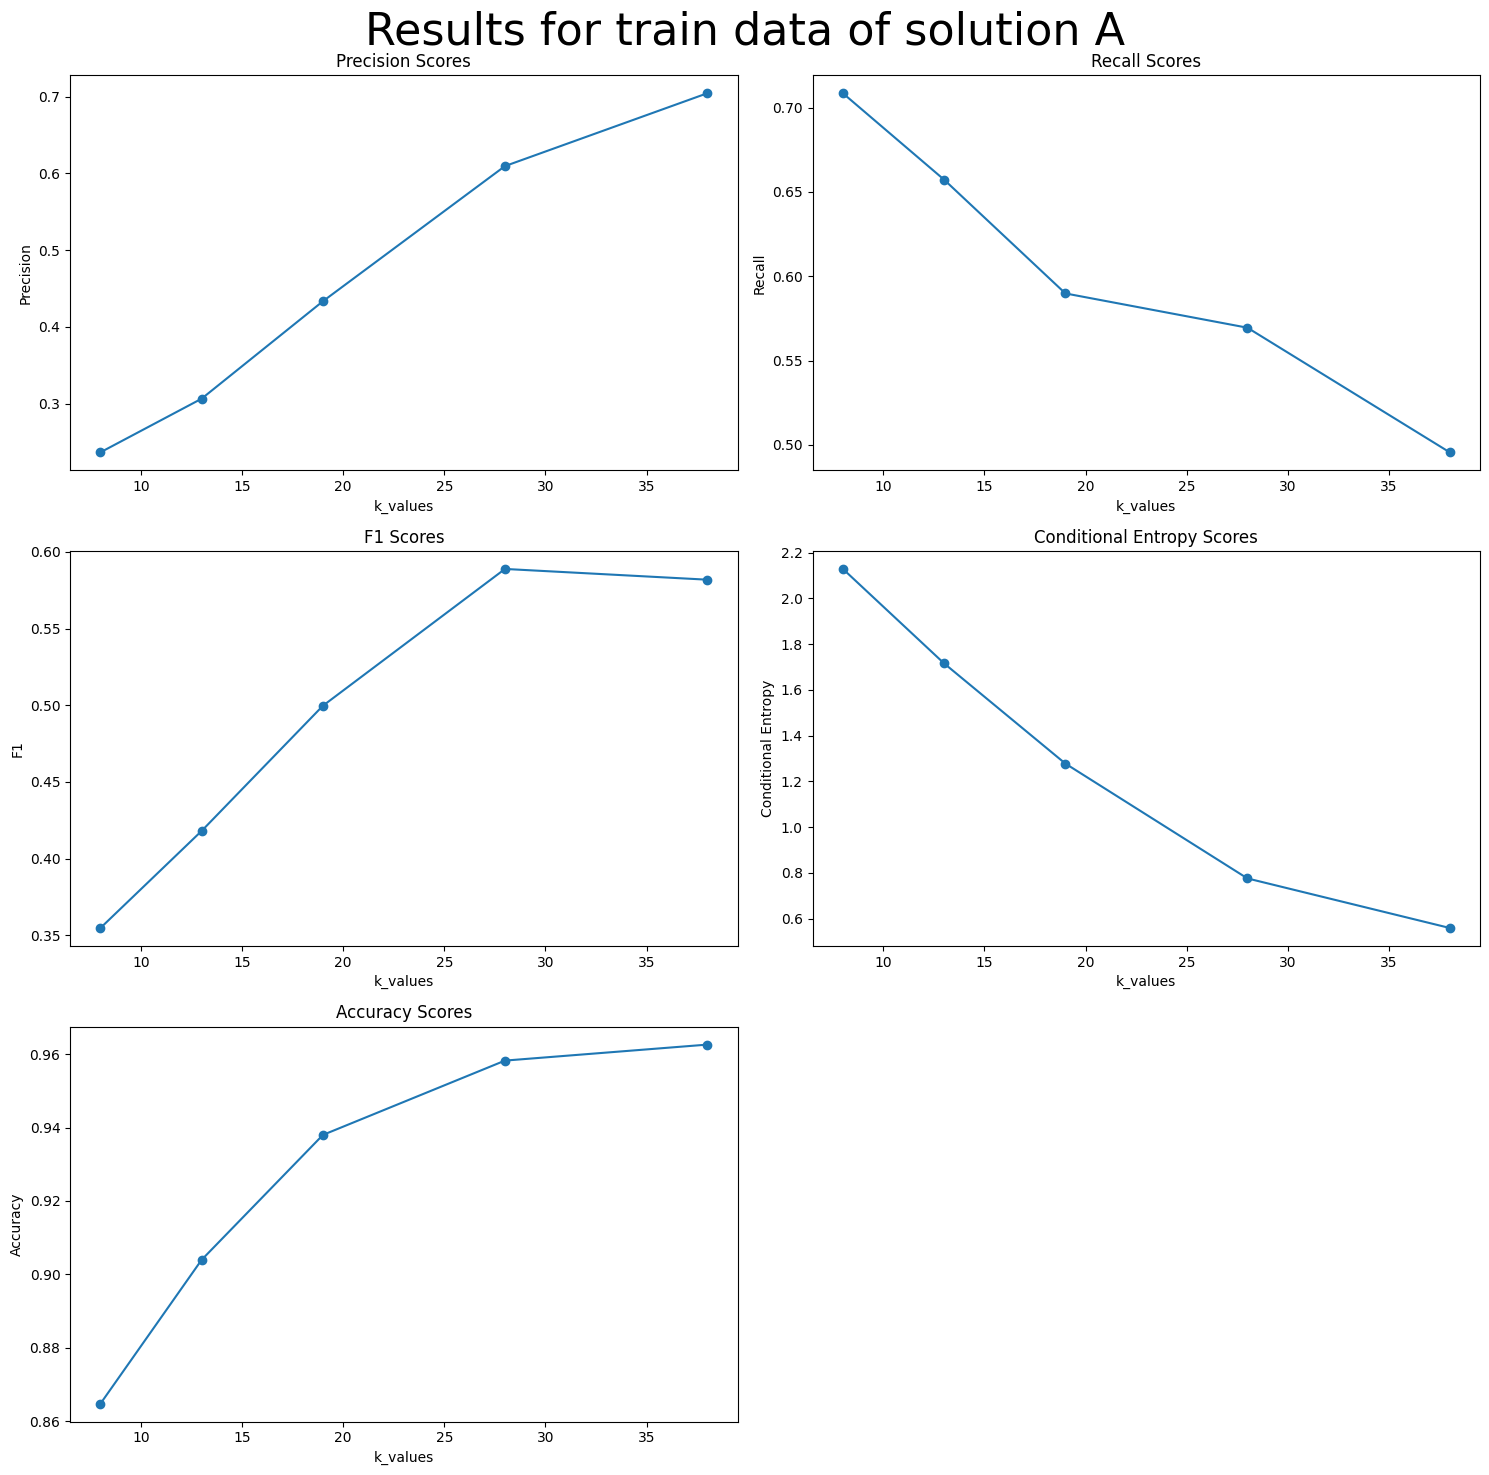

+------------+-------------+----------+----------+-----------------------+------------+
|   k_values |   Precision |   Recall |       F1 |   Conditional Entropy |   Accuracy |
+============+=============+==========+==========+=======================+============+
|          8 |    0.236739 | 0.708489 | 0.354892 |              2.12875  |   0.86477  |
+------------+-------------+----------+----------+-----------------------+------------+
|         13 |    0.30654  | 0.657291 | 0.418095 |              1.71616  |   0.903941 |
+------------+-------------+----------+----------+-----------------------+------------+
|         19 |    0.433466 | 0.589821 | 0.499698 |              1.27795  |   0.937992 |
+------------+-------------+----------+----------+-----------------------+------------+
|         28 |    0.609453 | 0.569497 | 0.588798 |              0.776123 |   0.958238 |
+------------+-------------+----------+----------+-----------------------+------------+
|         38 |    0.704256 | 0.4

In [5]:
# Solution A - train
plotter_solution_a_train = Plotter(k_values, solution_a_results_train[:, 0], solution_a_results_train[:, 1], 
                                   solution_a_results_train[:, 2], solution_a_results_train[:, 3], 
                                   solution_a_results_train[:, 4], 'Results for train data of solution A')
plotter_solution_a_train.plot_scores()
plotter_solution_a_train.tabulate_scores()

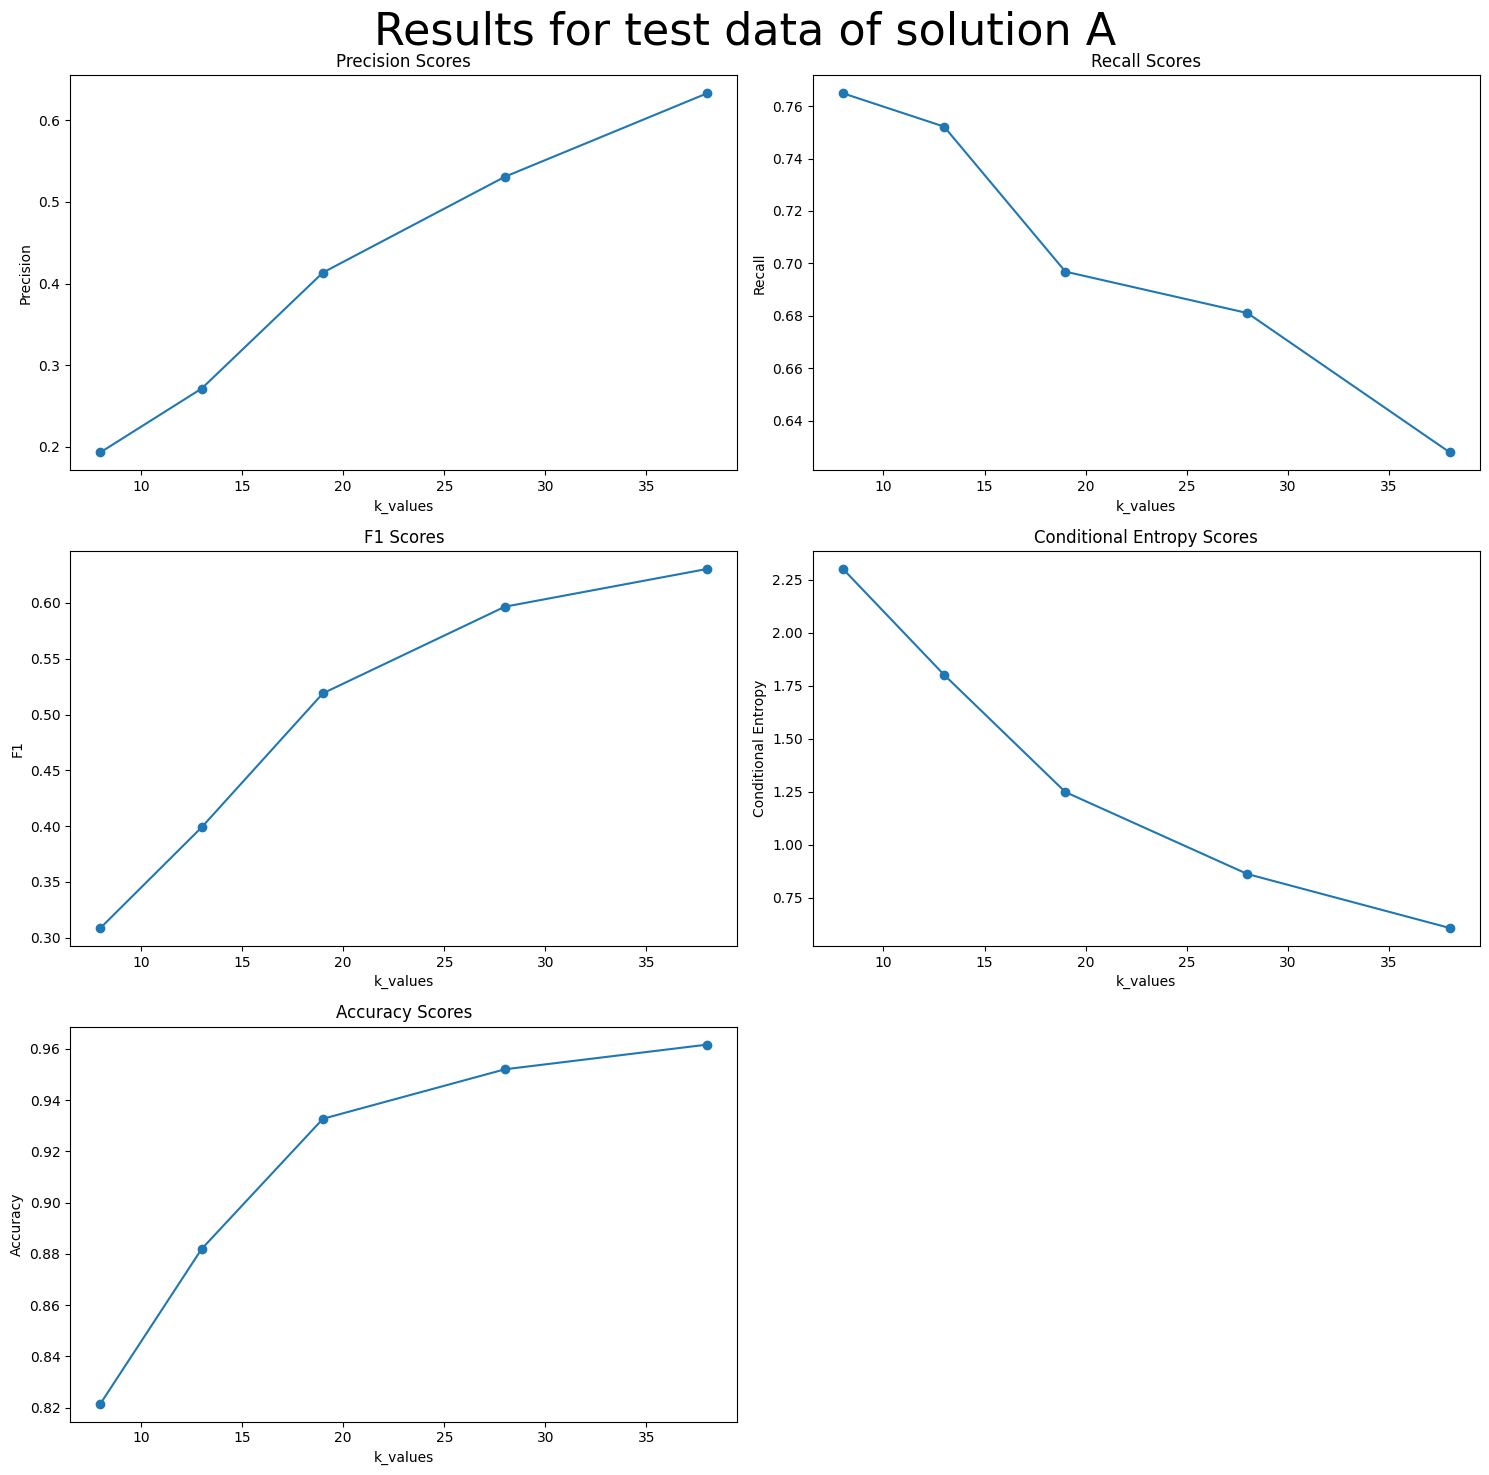

+------------+-------------+----------+----------+-----------------------+------------+
|   k_values |   Precision |   Recall |       F1 |   Conditional Entropy |   Accuracy |
+============+=============+==========+==========+=======================+============+
|          8 |    0.193442 | 0.764935 | 0.308794 |              2.30129  |   0.821544 |
+------------+-------------+----------+----------+-----------------------+------------+
|         13 |    0.271438 | 0.752205 | 0.398923 |              1.80155  |   0.881874 |
+------------+-------------+----------+----------+-----------------------+------------+
|         19 |    0.41351  | 0.696849 | 0.519029 |              1.24796  |   0.932697 |
+------------+-------------+----------+----------+-----------------------+------------+
|         28 |    0.530854 | 0.681036 | 0.59664  |              0.861069 |   0.952014 |
+------------+-------------+----------+----------+-----------------------+------------+
|         38 |    0.633022 | 0.6

In [6]:
# Solution A - test
plotter_solution_a_test = Plotter(k_values, solution_a_results_test[:, 0], solution_a_results_test[:, 1],
                                   solution_a_results_test[:, 2], solution_a_results_test[:, 3],
                                   solution_a_results_test[:, 4], 'Results for test data of solution A')
plotter_solution_a_test.plot_scores()
plotter_solution_a_test.tabulate_scores()

## Solution B of data (PCA)

In [7]:
for i in range(len(k_values)):
      kmeans = KmeansClustering(k_values[i])
      kmeans.fit(x_train2)

      clusters_train_data = kmeans.predict(x_train2)
      evaluator_train = Evaluator(y_train2, clusters_train_data)

      solution_b_results_train[i, 0] = evaluator_train.compute_precision()
      solution_b_results_train[i, 1] = evaluator_train.compute_recall()
      solution_b_results_train[i, 2] = evaluator_train.compute_f1()
      solution_b_results_train[i, 3] = evaluator_train.compute_conditional_entropy()
      solution_b_results_train[i, 4] = evaluator_train.computer_accuracy()


      clusters_test_data = kmeans.predict(x_test2)
      evaluator_test = Evaluator(y_test2, clusters_test_data)

      solution_b_results_test[i, 0] = evaluator_test.compute_precision()
      solution_b_results_test[i, 1] = evaluator_test.compute_recall()
      solution_b_results_test[i, 2] = evaluator_test.compute_f1()
      solution_b_results_test[i, 3] = evaluator_test.compute_conditional_entropy()
      solution_b_results_test[i, 4] = evaluator_test.computer_accuracy()

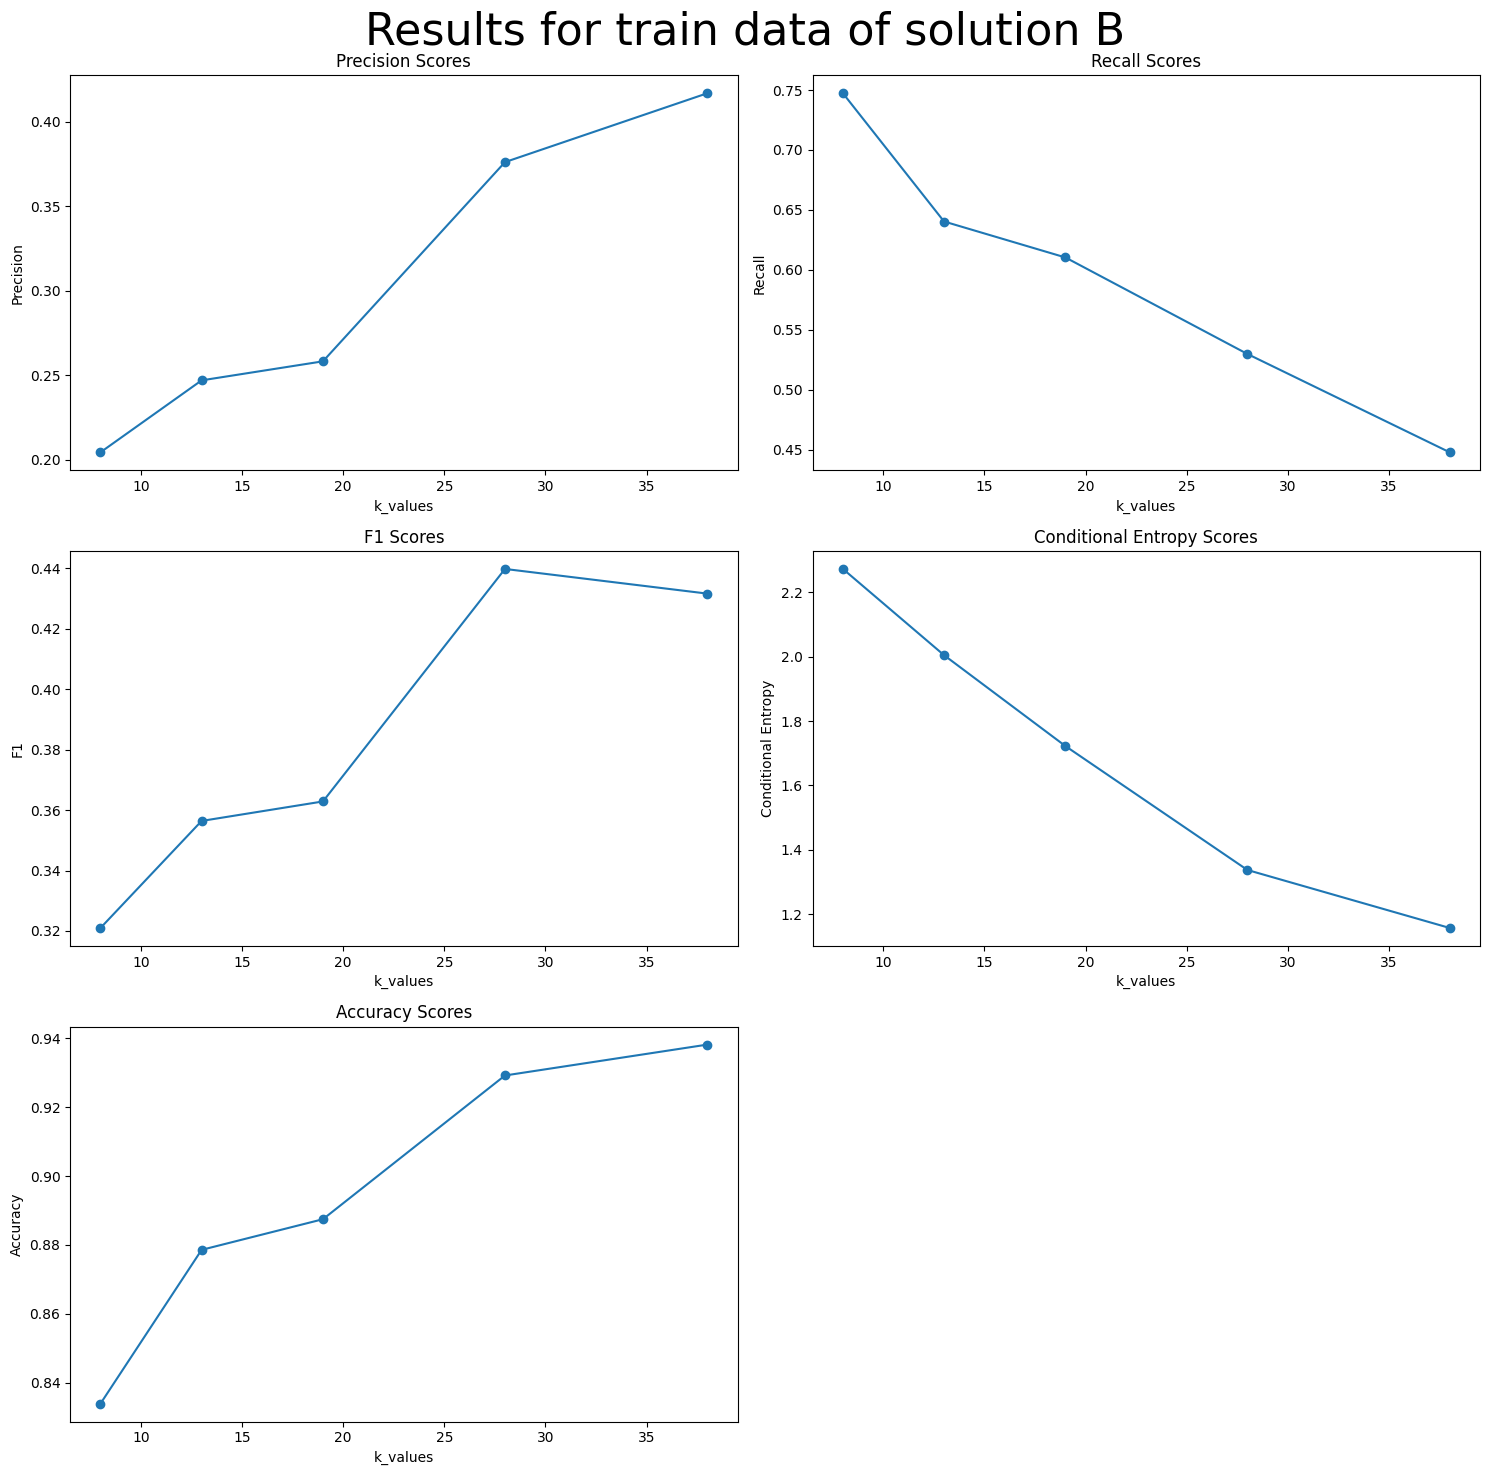

+------------+-------------+----------+----------+-----------------------+------------+
|   k_values |   Precision |   Recall |       F1 |   Conditional Entropy |   Accuracy |
+============+=============+==========+==========+=======================+============+
|          8 |    0.20438  | 0.747317 | 0.320978 |               2.27232 |   0.833997 |
+------------+-------------+----------+----------+-----------------------+------------+
|         13 |    0.246923 | 0.640337 | 0.356409 |               2.00455 |   0.878585 |
+------------+-------------+----------+----------+-----------------------+------------+
|         19 |    0.258178 | 0.610341 | 0.362863 |               1.72234 |   0.887471 |
+------------+-------------+----------+----------+-----------------------+------------+
|         28 |    0.375988 | 0.529802 | 0.439835 |               1.3374  |   0.92915  |
+------------+-------------+----------+----------+-----------------------+------------+
|         38 |    0.416693 | 0.4

In [8]:
# Solution B - train
plotter_solution_b_train = Plotter(k_values, solution_b_results_train[:, 0], solution_b_results_train[:, 1],
                                   solution_b_results_train[:, 2], solution_b_results_train[:, 3],
                                   solution_b_results_train[:, 4], 'Results for train data of solution B')
plotter_solution_b_train.plot_scores()
plotter_solution_b_train.tabulate_scores()

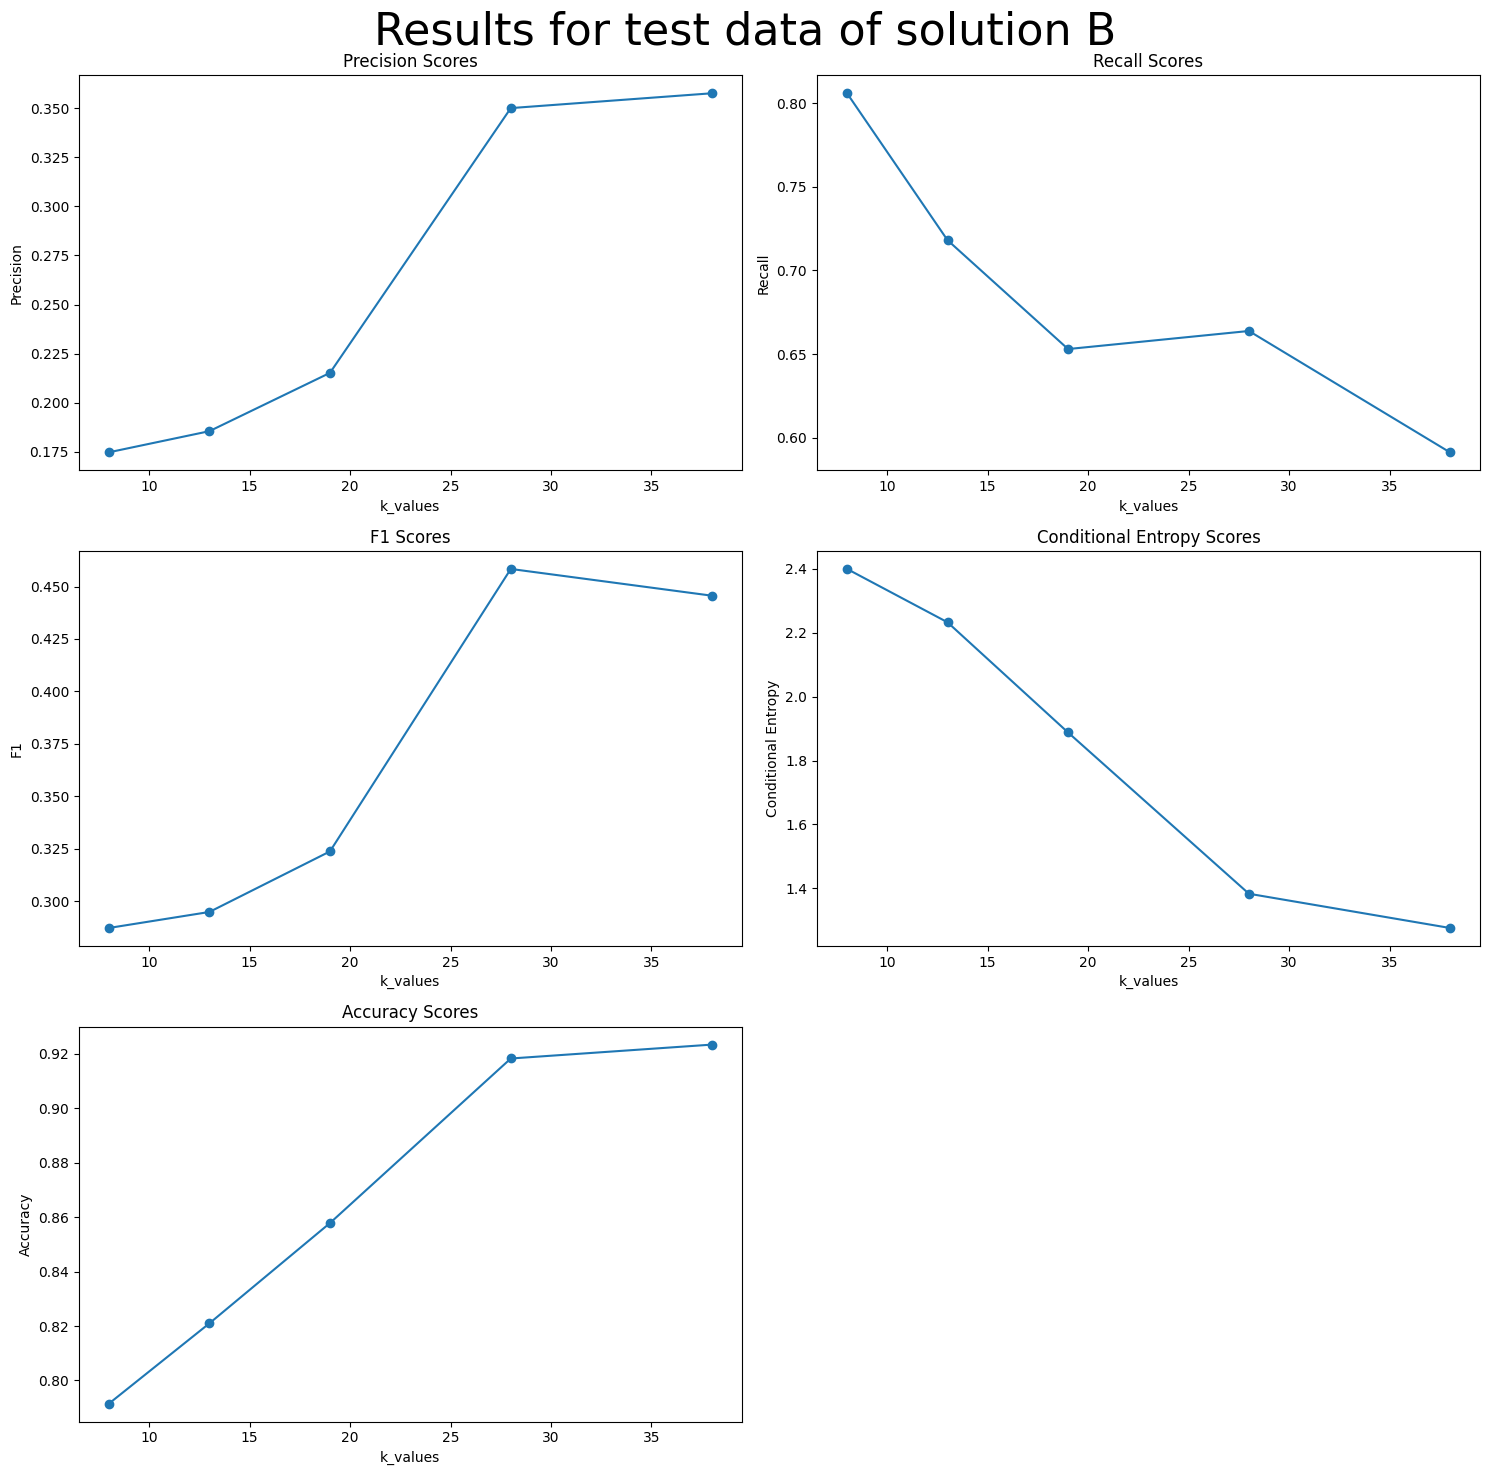

+------------+-------------+----------+----------+-----------------------+------------+
|   k_values |   Precision |   Recall |       F1 |   Conditional Entropy |   Accuracy |
+============+=============+==========+==========+=======================+============+
|          8 |    0.174723 | 0.806048 | 0.287192 |               2.39945 |   0.79149  |
+------------+-------------+----------+----------+-----------------------+------------+
|         13 |    0.185485 | 0.718133 | 0.294821 |               2.2326  |   0.820975 |
+------------+-------------+----------+----------+-----------------------+------------+
|         19 |    0.215183 | 0.652966 | 0.323693 |               1.88783 |   0.85781  |
+------------+-------------+----------+----------+-----------------------+------------+
|         28 |    0.35006  | 0.663781 | 0.458382 |               1.38333 |   0.918256 |
+------------+-------------+----------+----------+-----------------------+------------+
|         38 |    0.357607 | 0.5

In [9]:
# Solution A - test
plotter_solution_b_test = Plotter(k_values, solution_b_results_test[:, 0], solution_b_results_test[:, 1],
                                  solution_b_results_test[:, 2], solution_b_results_test[:, 3],
                                  solution_b_results_test[:, 4], 'Results for test data of solution B')
plotter_solution_b_test.plot_scores()
plotter_solution_b_test.tabulate_scores()

# Spectral Clustering

Spectral clustering is a potent technique in machine learning and data mining aimed at partitioning data points into meaningful clusters based on their similarities, and by similarities we mean any similarity property that can be generated by some kernel function digging deep into the data properties. Unlike traditional clustering algorithms such as K-Means, spectral clustering is much more flexible in recognizing data clusters that have forms different from the spherical cluster form, this what makes it very powerful in finding clusters that are impossible to recognize using the previous clustering technique, K-Means.
 
Spectral clustering operates by leveraging the eigenvalues and eigenvectors of a similarity matrix derived from the dataset. It begins by constructing a similarity graph from the data points, where nodes represent data points and edges denote the strength of connections between them (similarity measure and not dissimilarity measure such as distance. Next, the Laplacian matrix of the graph is computed, encapsulating the graph's topology. Subsequently, eigenvalues and eigenvectors of the Laplacian matrix are calculated, which capture essential structural information about the data and are utilized for clustering. After performing eigen decomposition on the laplacian matrix computed, we select the smallest k-1 eigenvectors, where k denote the number of clusters specified, corresponding to the k-1 smallest eigenvalues that are non-zero. Note that through the zero eigenvalues we can know the number of strongly connected component that are present in this similarity graph.

The flexibility of spectral clustering lies in its ability to handle complex geometric structures and non-linear separations, making it suitable for diverse datasets. Moreover, spectral clustering is robust to initialization, as it is not sensitive to the initial cluster centers like K-Means. Additionally, it exhibits scalability.

Spectral clustering finds applications across various domains. It is commonly used in image segmentation to partition images into meaningful regions based on pixel similarities. In community detection, it helps identify communities or groups within social or biological networks. Furthermore, in gene expression analysis, spectral clustering is employed to cluster genes based on their expression profiles, facilitating the discovery of patterns and relationships.

Overall, spectral clustering stands as a versatile and potent technique for unsupervised learning and clustering tasks. By capitalizing on the spectral properties of data, spectral clustering can unveil hidden structures and patterns, that are not possible to recognize via other clustering techniques, making it indispensable in data analysis and exploration. In the context of our assignment on daily and sports activity detection, spectral clustering offers a promising approach to effectively cluster and identify distinct activity patterns.

<div style="text-align:center;">
 
![Spectral Clustering Algorithm Pseudocode](images/spectral_pseudo.png)
 
</div>

In [10]:
evaluators = []
evaluators_names = []

## On Solution A Dataset

In [11]:
# evaluate on train set
spectralClustering = SpectralClustering()
spectralClustering.fit(x_train)
solution_a_train_clusters_found = spectralClustering.predict()

evaluators.append(Evaluator(y_train-1, solution_a_train_clusters_found))
evaluators_names.append("Spectral Clustering (Training Set - Solution A)")

In [12]:
# evaluate on test set
spectralClustering = SpectralClustering()
spectralClustering.fit(x_test)
solution_a_test_clusters_found = spectralClustering.predict()

evaluators.append(Evaluator(y_test-1, solution_a_test_clusters_found))
evaluators_names.append("Spectral Clustering (Test Set - Solution A)")

## On Solution B Dataset

In [13]:
# evaluate on train set
spectralClustering = SpectralClustering()
spectralClustering.fit(x_train2)
solution_b_train_clusters_found = spectralClustering.predict()

evaluators.append(Evaluator(y_train2-1, solution_b_train_clusters_found))
evaluators_names.append("Spectral Clustering (Training Set - Solution B)")

In [14]:
# evaluate on test set
spectralClustering = SpectralClustering()
spectralClustering.fit(x_test2)
solution_b_test_clusters_found = spectralClustering.predict()

evaluators.append(Evaluator(y_test2-1, solution_b_test_clusters_found))
evaluators_names.append("Spectral Clustering (Test Set - Solution B)")

## Results

+-------------------------------------------------+-------------+----------+------------+-----------------------+------------+
| Model Name                                      |   Precision |   Recall |   F1-Score |   Conditional Entropy |   Accuracy |
+=================================================+=============+==========+============+=======================+============+
| Spectral Clustering (Training Set - Solution A) |    0.144296 | 0.385587 |   0.210004 |               2.32249 |   0.819128 |
+-------------------------------------------------+-------------+----------+------------+-----------------------+------------+
| Spectral Clustering (Test Set - Solution A)     |    0.186352 | 0.457127 |   0.264769 |               2.0681  |   0.864864 |
+-------------------------------------------------+-------------+----------+------------+-----------------------+------------+
| Spectral Clustering (Training Set - Solution B) |    0.157302 | 0.314078 |   0.209619 |               2.59133

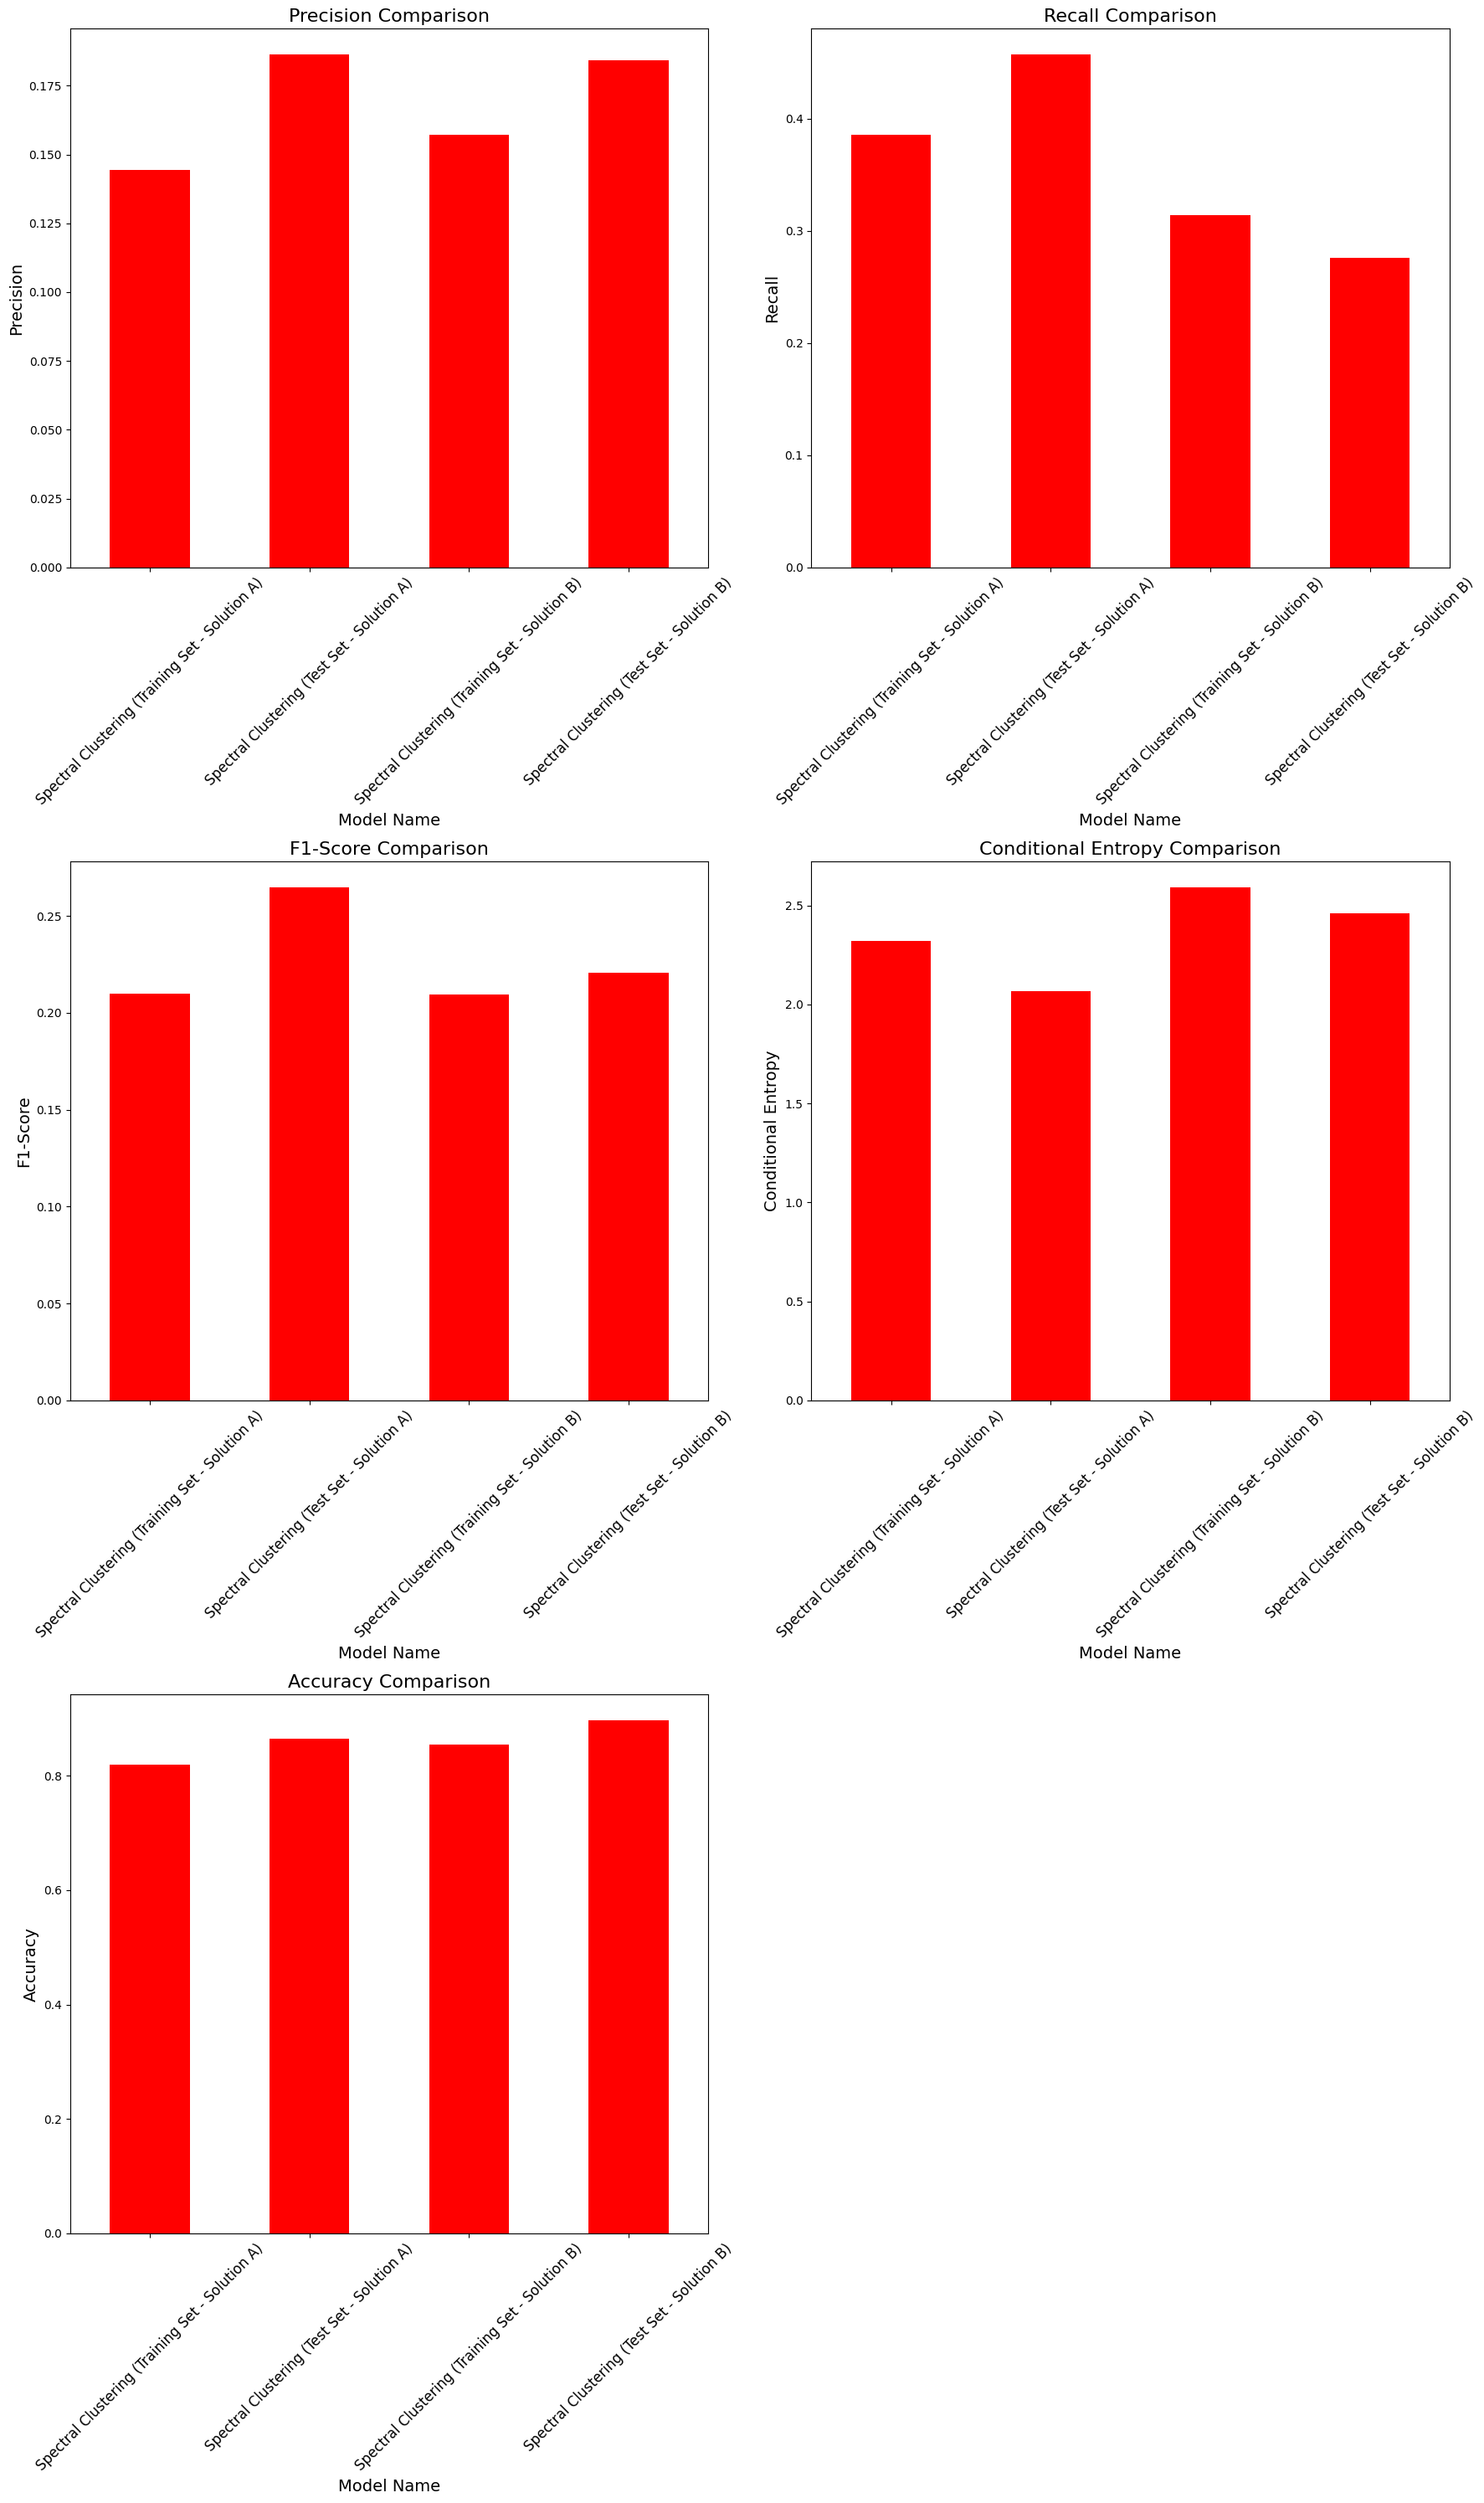

In [15]:
show_evaluation(evaluators, evaluators_names)

# DBSCAN

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a popular clustering algorithm widely used in data mining and machine learning. Unlike traditional clustering algorithms like K-Means, which require a predefined number of clusters, DBSCAN is capable of discovering clusters of arbitrary shapes and sizes in the data without prior knowledge of the number of clusters. It operates by partitioning the dataset into regions of high density separated by regions of low density, thereby effectively identifying clusters while also being robust to noise and outliers.

DBSCAN defines clusters as dense regions of data points separated by sparser regions. The algorithm classifies data points into three categories: core points, border points, and noise points. A core point is a data point that has a sufficient number of neighboring points within a specified distance (eps). Border points are not dense enough to be considered core points but lie within the neighborhood of a core point. Noise points, also known as outliers, are data points that do not belong to any cluster. By iteratively exploring the neighborhood of each core point, DBSCAN constructs clusters by connecting core points and merging them into larger clusters while assigning border points to the corresponding clusters. This approach enables DBSCAN to handle datasets with varying densities and effectively capture complex cluster structures, making it a valuable tool in various applications, including spatial data analysis, image processing, and anomaly detection.

<div style="text-align:center;">
 
![DBSCAN Algorithm Pseudocode](images/dbscan_pseudo.png)
 
</div>

In [16]:
dbscan_evaluators = []
dbscan_evaluators_names = []

## On Solution A Dataset

In [17]:
# evaluate on train set
dbscan = DBSCAN(eps=2.1, min_samples=40)
solution_a_train_clusters_found_dbscan = filter_dbscan_clusters(dbscan.fit(x_train))

dbscan_evaluators.append(Evaluator(y_train-1, solution_a_train_clusters_found_dbscan))
dbscan_evaluators_names.append("DBSCAN (Training Set - Solution A)")

In [18]:
# evaluate on test set
dbscan = DBSCAN(eps=2.1, min_samples=40)
solution_a_test_clusters_found_dbscan = filter_dbscan_clusters(dbscan.fit(x_test))

dbscan_evaluators.append(Evaluator(y_test-1, solution_a_test_clusters_found_dbscan))
dbscan_evaluators_names.append("DBSCAN (Test Set - Solution A)")

## On Solution B Dataset

In [19]:
# evaluate on train set
dbscan = DBSCAN(eps=2.1, min_samples=40)
solution_b_train_clusters_found_dbscan = filter_dbscan_clusters(dbscan.fit(x_train2))

dbscan_evaluators.append(Evaluator(y_train2-1, solution_b_train_clusters_found_dbscan))
dbscan_evaluators_names.append("DBSCAN (Training Set - Solution B)")

In [20]:
# evaluate on test set
dbscan = DBSCAN(eps=2.1, min_samples=40)
solution_b_test_clusters_found_dbscan = filter_dbscan_clusters(dbscan.fit(x_test2))

dbscan_evaluators.append(Evaluator(y_test2-1, solution_b_test_clusters_found_dbscan))
dbscan_evaluators_names.append("DBSCAN (Test Set - Solution B)")

## Results

+------------------------------------+-------------+----------+------------+-----------------------+------------+
| Model Name                         |   Precision |   Recall |   F1-Score |   Conditional Entropy |   Accuracy |
+====================================+=============+==========+============+=======================+============+
| DBSCAN (Training Set - Solution A) |   0.0637673 | 0.894282 |  0.119046  |               3.88775 |  0.305109  |
+------------------------------------+-------------+----------+------------+-----------------------+------------+
| DBSCAN (Test Set - Solution A)     |   0.0668267 | 0.692175 |  0.121886  |               3.97846 |  0.480267  |
+------------------------------------+-------------+----------+------------+-----------------------+------------+
| DBSCAN (Training Set - Solution B) |   0.0574504 | 0.91294  |  0.108098  |               3.9881  |  0.209059  |
+------------------------------------+-------------+----------+------------+------------

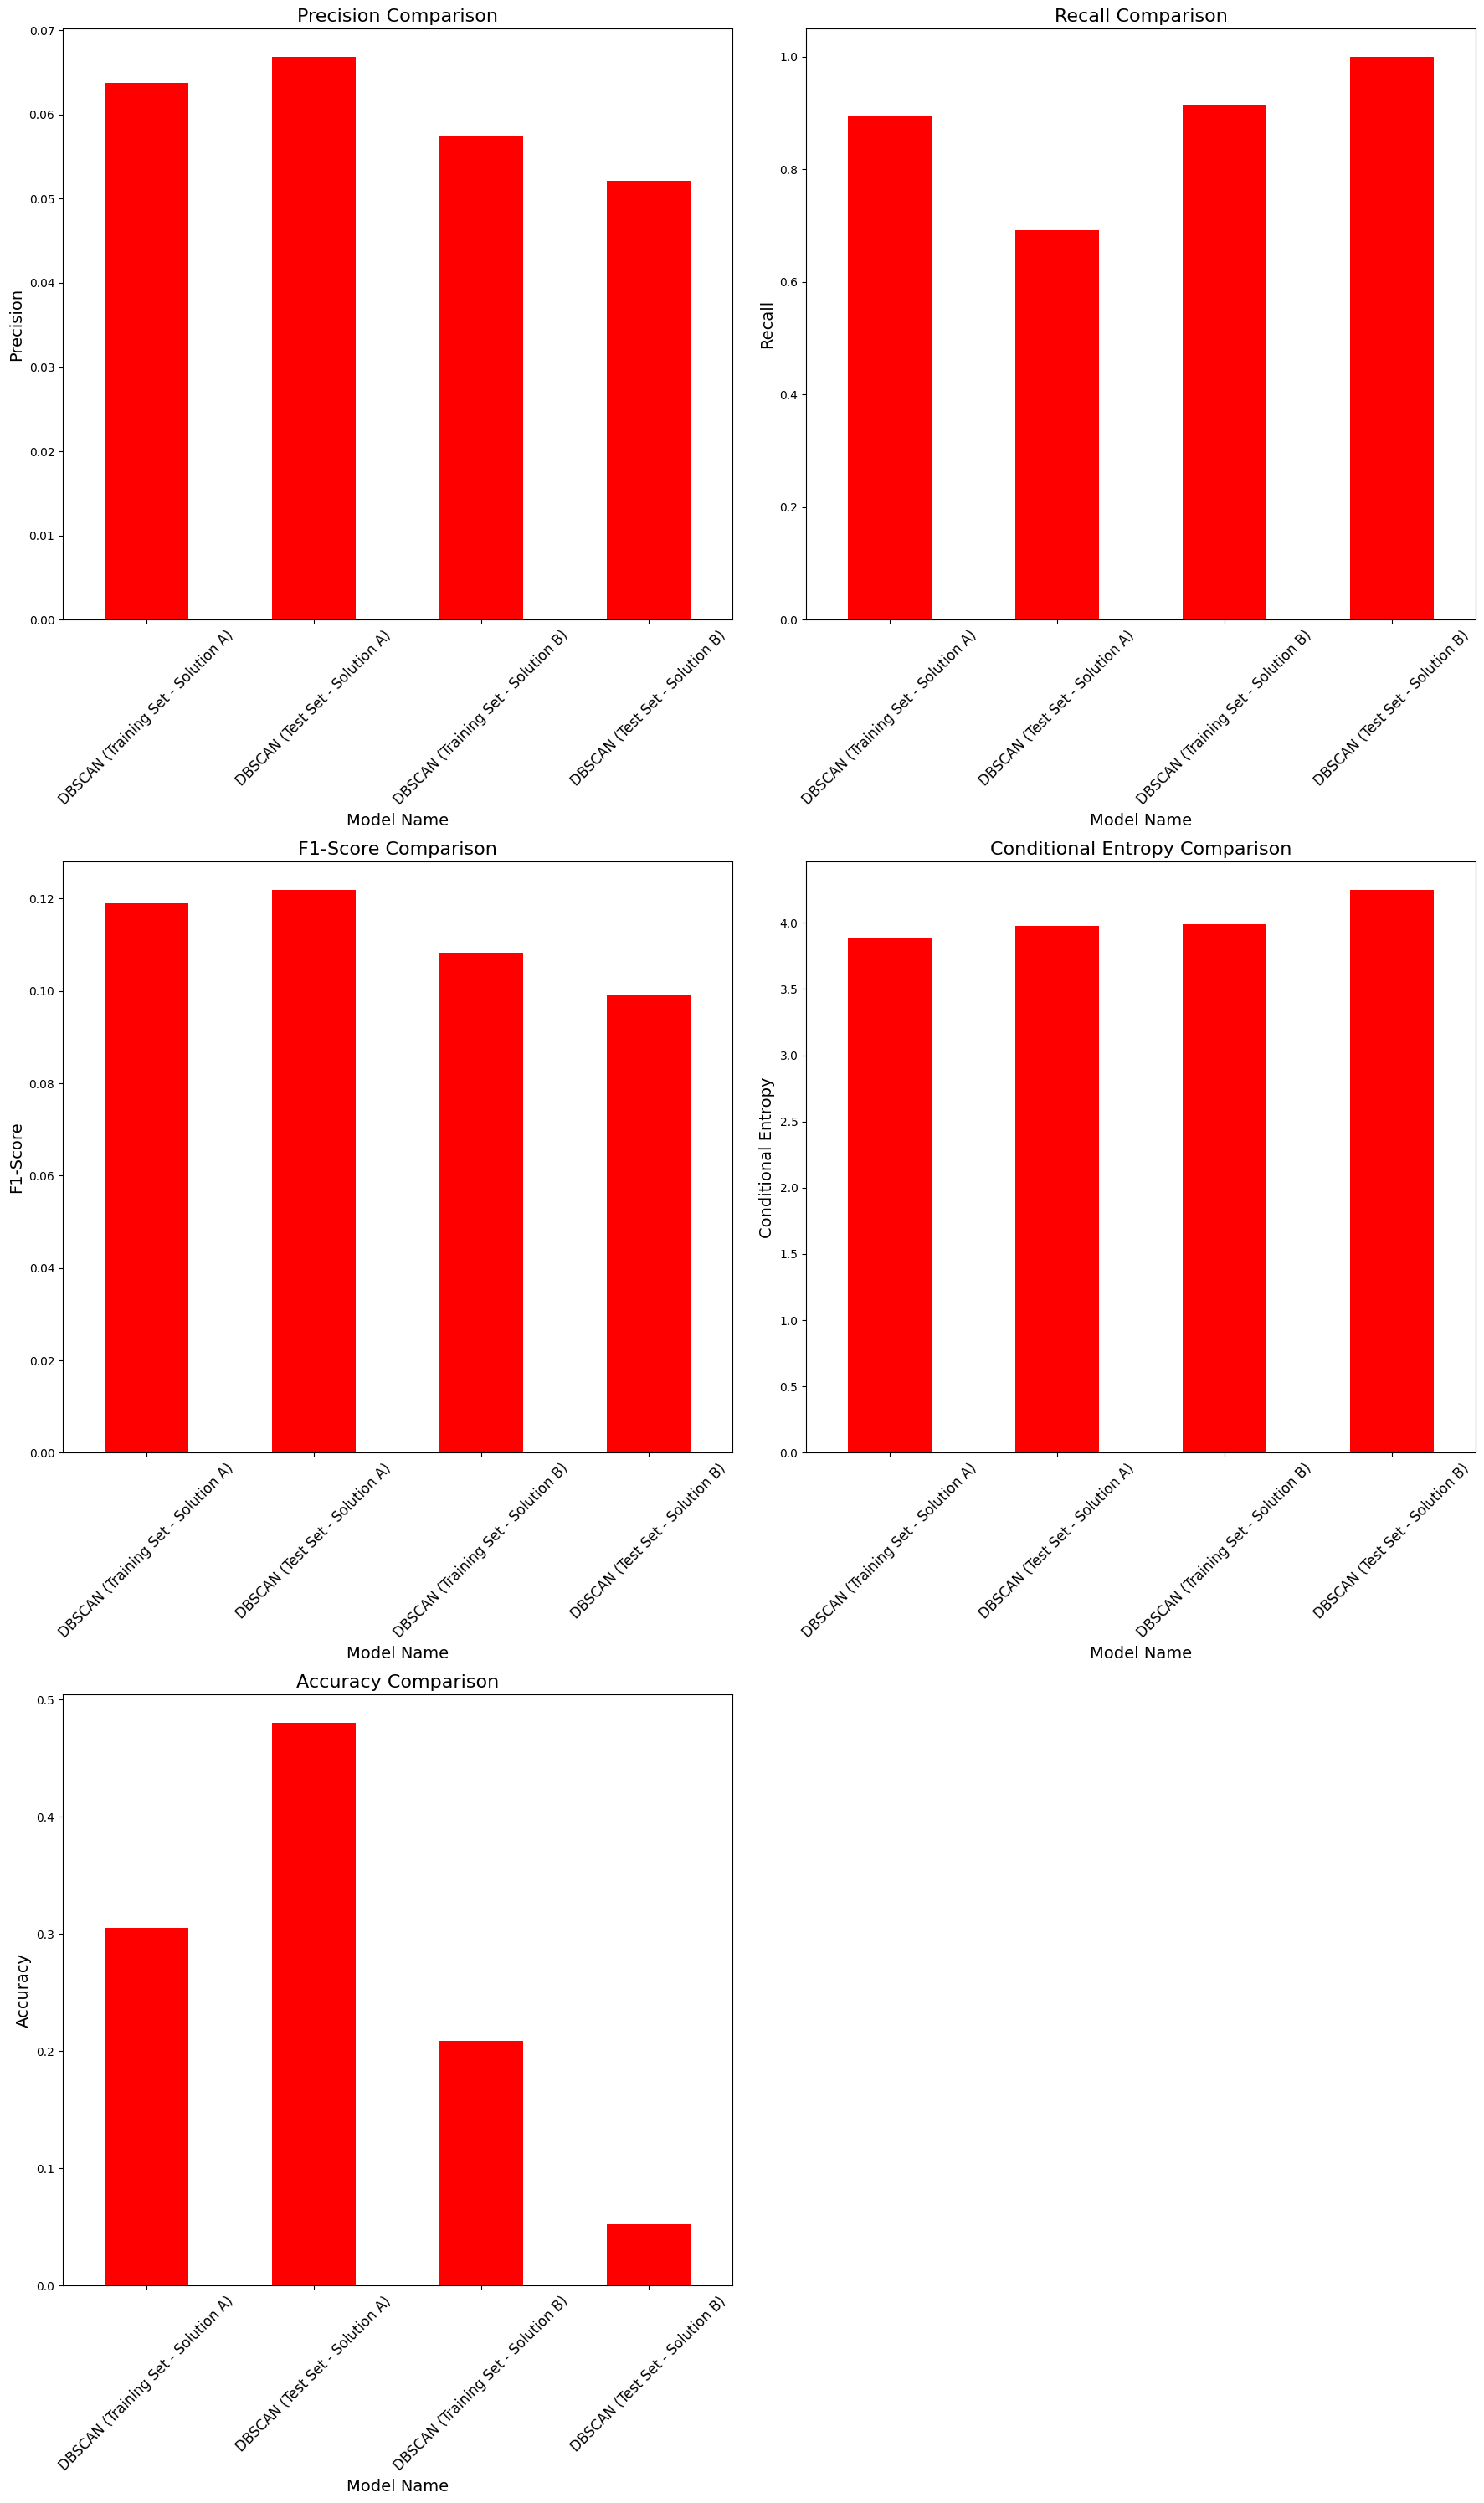

In [21]:
show_evaluation(dbscan_evaluators, dbscan_evaluators_names)

# Results and Analysis

Analysis Here

# References and Resources

1. [PEP 8 Style guide for python code - Module Names](https://peps.python.org/pep-0008/#package-and-module-names)